<a href="https://colab.research.google.com/github/SFStefenon/STLprophet/blob/main/STLprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STLprophet

Dr. **Stefano Frizzo Stefenon**.

Trento, Italy, January 10, 2023.

This notebook presents an application of the **Facebook's Prophet** approach using seasonal and trend decomposition using LOESS (**STL**) to forecast **Italian electricity** spot prices.

Setup definition:

In [53]:
# Definition of the signal to be used.
Sig = 0
# 0 - Use the original signal
# 1 - Use of the STL for denoising

# Import Libraries

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os                                                                        
import networkx as nx                                                            
import tensorflow as tf                                                          
from tensorflow import keras 

import random
import pickle as pkl
import keras
from keras.models import Sequential, Model, load_model
from keras.layers import LSTM, Dense, RepeatVector, TimeDistributed, Input, Activation
from keras.layers import BatchNormalization, multiply, concatenate, Flatten, dot

from keras.callbacks import EarlyStopping
import pydot as pyd
from keras.utils.vis_utils import plot_model, model_to_dot
keras.utils.vis_utils.pydot = pyd

# Dataset (Italy Electricity Spot Prices - EUR/MWh)

Additional information and updated values can be found at:

https://ember-climate.org/data-catalogue/european-wholesale-electricity-price-data/

In [55]:
it = pd.read_csv('italy.csv')

time = it.values[:,2]
x = it.values[:,3]

# We considered the values from the last 12 months 
x = x[2890-(12*30):2890]
time = time[2890-(12*30):2890]

In [56]:
print(time[0])
print(time[len(time)-1])

2021-12-06
2022-11-30


# Seasonal-Trend decomposition

In [57]:
# Create a time step according to the model needs
f = pd.Series(x, index=pd.date_range(time[0], periods=len(x), freq="D"), name="DF")

Seasonal-Trend decomposition using LOESS (**STL**) is a method of time series decomposition analyses. The STL uses locally fitted regression models to decompose a time series into trend, seasonal, and remainder components.

Additional information can be found in:
"*R. B. Cleveland, W. S. Cleveland, J.E. McRae, and I. Terpenning (1990) STL: A Seasonal-Trend Decomposition Procedure Based on LOESS. Journal of Official Statistics, 6, 3-73*".

In [58]:
from statsmodels.tsa.seasonal import STL
# Seasonal: Length of the seasonal smoother. Must be an odd integer.
# Trend: Length of the trend smoother. Must be an odd integer. 
stl = STL(f, trend=21, seasonal=21)
res = stl.fit()

## Plots of the decomposition

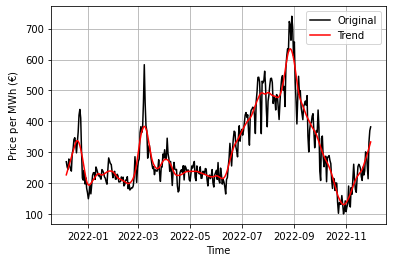

In [59]:
# Original vs Trend
plt.figure(figsize=(6, 4))
plt.plot(res.observed, 'k', res.trend, 'r')
plt.xlabel('Time')
plt.ylabel('Price per MWh ($€$)')
plt.legend(["Original", "Trend"], loc="upper right", ncol=1)
# plt.savefig('trend.pdf')
plt.grid()

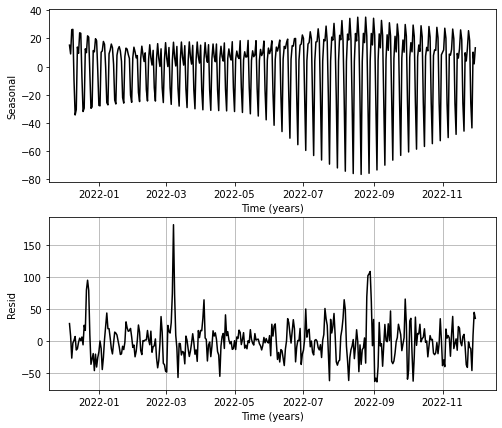

In [60]:
# Seasonal and Resid
plt.figure(figsize=(8, 7))
plt.subplot(211)
plt.plot(res.seasonal, 'k')
plt.xlabel('Time (years)')
plt.ylabel('Seasonal')
plt.subplot(212)
plt.plot(res.resid, 'k')
plt.xlabel('Time (years)')
plt.ylabel('Resid')
# plt.savefig('RS.pdf')
plt.grid()

<function matplotlib.pyplot.show(close=None, block=None)>

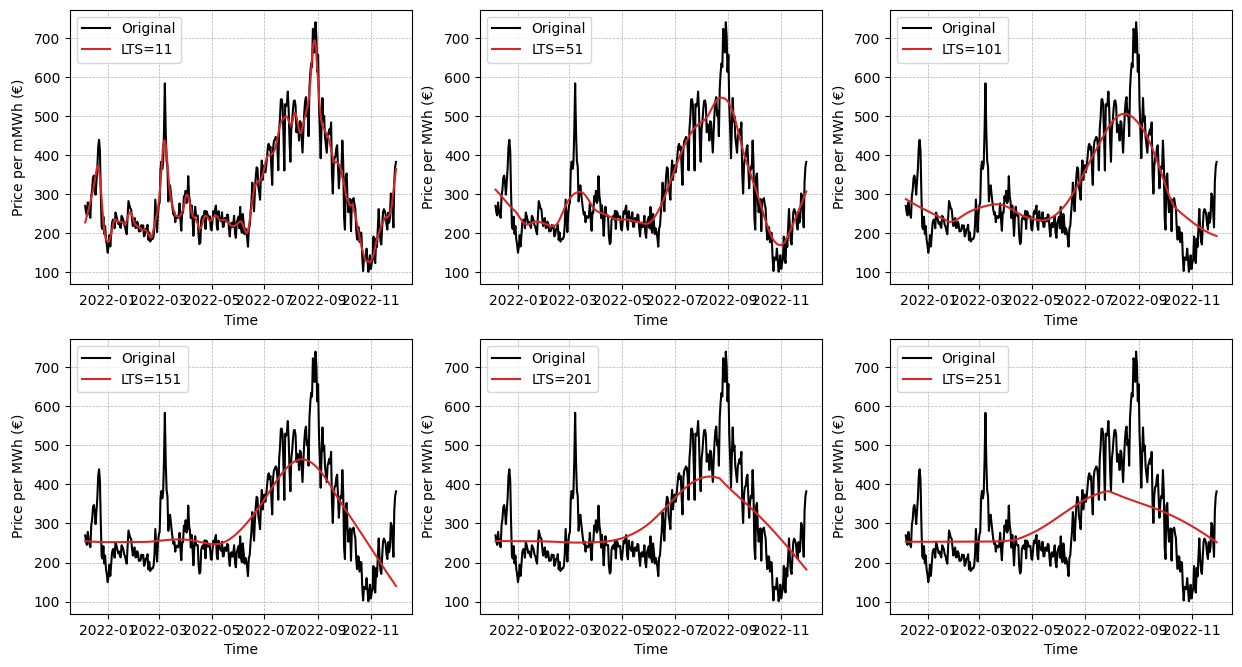

In [61]:
x1 = res.observed

stl1 = STL(f, trend=11, seasonal=7)
x_1 = (stl1.fit()).trend
stl2 = STL(f, trend=51, seasonal=7)
x_2 = (stl2.fit()).trend
stl3 = STL(f, trend=101, seasonal=7)
x_3 = (stl3.fit()).trend
stl4 = STL(f, trend=151, seasonal=7)
x_4 = (stl4.fit()).trend
stl5 = STL(f, trend=201, seasonal=7)
x_5 = (stl5.fit()).trend
stl6 = STL(f, trend=251, seasonal=7)
x_6 = (stl6.fit()).trend

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 8), dpi=100)

ax1.plot(x1,'k', zorder=2)
ax1.plot(x_1,'tab:red', zorder=2)
ax1.set_ylabel('Price per mMWh ($€$)')
ax1.set_xlabel('Time')
ax1.grid(linestyle = '--', linewidth = 0.5, zorder=0)
ax1.legend(["Original", "LTS=11"], loc="upper left", fancybox=True, shadow=False, ncol=1)

ax2.plot(x1,'k', zorder=2)
ax2.plot(x_2,'tab:red', zorder=2)
ax2.set_ylabel('Price per MWh ($€$)')
ax2.set_xlabel('Time')
ax2.grid(linestyle = '--', linewidth = 0.5, zorder=0)
ax2.legend(["Original", "LTS=51"], loc="upper left", fancybox=True, shadow=False, ncol=1)

ax3.plot(x1,'k', zorder=2)
ax3.plot(x_3,'tab:red', zorder=2)
ax3.set_ylabel('Price per MWh ($€$)')
ax3.set_xlabel('Time')
ax3.grid(linestyle = '--', linewidth = 0.5, zorder=0)
ax3.legend(["Original", "LTS=101"], loc="upper left", fancybox=True, shadow=False, ncol=1)

ax4.plot(x1,'k', zorder=2)
ax4.plot(x_4,'tab:red', zorder=2)
ax4.set_ylabel('Price per MWh ($€$)')
ax4.set_xlabel('Time')
ax4.grid(linestyle = '--', linewidth = 0.5, zorder=0)
ax4.legend(["Original", "LTS=151"], loc="upper left", fancybox=True, shadow=False, ncol=1)

ax5.plot(x1,'k', zorder=2)
ax5.plot(x_5,'tab:red', zorder=2)
ax5.set_ylabel('Price per MWh ($€$)')
ax5.set_xlabel('Time')
ax5.grid(linestyle = '--', linewidth = 0.5, zorder=0)
ax5.legend(["Original", "LTS=201"], loc="upper left", fancybox=True, shadow=False, ncol=1)

ax6.plot(x1,'k', zorder=2)
ax6.plot(x_6,'tab:red', zorder=2)
ax6.set_ylabel('Price per MWh ($€$)')
ax6.set_xlabel('Time')
ax6.grid(linestyle = '--', linewidth = 0.5, zorder=0)
ax6.legend(["Original", "LTS=251"], loc="upper left", fancybox=True, shadow=False, ncol=1)
# plt.savefig('trend_2.pdf')
plt.show  

<function matplotlib.pyplot.show(close=None, block=None)>

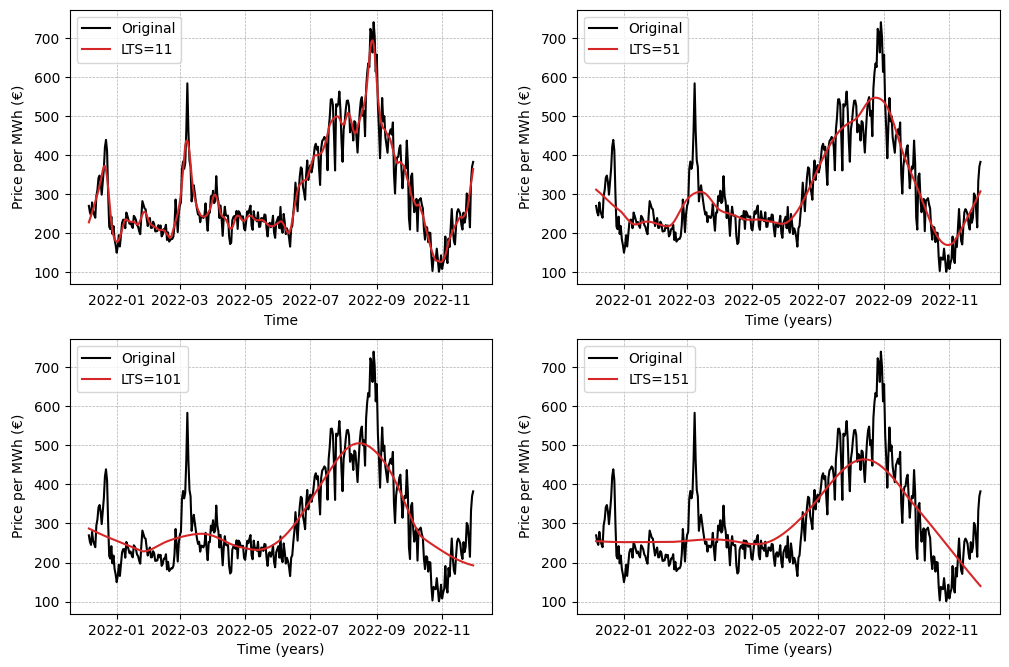

In [62]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8), dpi=100)

ax1.plot(x1,'k', zorder=2)
ax1.plot(x_1,'tab:red', zorder=2)
ax1.set_ylabel('Price per MWh ($€$)')
ax1.set_xlabel('Time')
ax1.grid(linestyle = '--', linewidth = 0.5, zorder=0)
ax1.legend(["Original", "LTS=11"], loc="upper left", fancybox=True, shadow=False, ncol=1)

ax2.plot(x1,'k', zorder=2)
ax2.plot(x_2,'tab:red', zorder=2)
ax2.set_ylabel('Price per MWh ($€$)')
ax2.set_xlabel('Time (years)')
ax2.grid(linestyle = '--', linewidth = 0.5, zorder=0)
ax2.legend(["Original", "LTS=51"], loc="upper left", fancybox=True, shadow=False, ncol=1)

ax3.plot(x1,'k', zorder=2)
ax3.plot(x_3,'tab:red', zorder=2)
ax3.set_ylabel('Price per MWh ($€$)')
ax3.set_xlabel('Time (years)')
ax3.grid(linestyle = '--', linewidth = 0.5, zorder=0)
ax3.legend(["Original", "LTS=101"], loc="upper left", fancybox=True, shadow=False, ncol=1)

ax4.plot(x1,'k', zorder=2)
ax4.plot(x_4,'tab:red', zorder=2)
ax4.set_ylabel('Price per MWh ($€$)')
ax4.set_xlabel('Time (years)')
ax4.grid(linestyle = '--', linewidth = 0.5, zorder=0)
ax4.legend(["Original", "LTS=151"], loc="upper left", fancybox=True, shadow=False, ncol=1)
# plt.savefig('trend_3.pdf') 
plt.show 

# Save data

In [63]:
# Create the variations
stl1 = STL(f, trend=21, seasonal=21)
x_1 = (stl1.fit()).trend

In [64]:
# Export de data
y_orig = [time, x1] # Original signal
df_orig = np.transpose(y_orig)
pd.DataFrame(df_orig).to_csv("df_orig.csv", index=False)
y_STL = [time, x_1] # STL
df_STL = np.transpose(y_STL)
pd.DataFrame(df_STL).to_csv("df_STL.csv", index=False)

In [65]:
# Import de data  
if Sig == 0: # Original signal
  df = pd.read_csv('df_orig.csv')
if Sig == 1: # Decomposition with STL
  df = pd.read_csv('df_STL.csv')

# Facebook’s Prophet

In [66]:
!pip install localpip --quiet
!pip install pystan~=2.14 --quiet
!pip install fbprophet --quiet
from fbprophet import Prophet

In [67]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

In [68]:
# Number of observations we want to predict
nobs = 1
train = df[:-nobs]
test = df[-nobs:]

In [69]:
print(f"Length of dataframe: {len(df)}\n"
      f"Length of train set: {len(train)}\n"
      f"Length of test set: {len(test)}")

Length of dataframe: 360
Length of train set: 359
Length of test set: 1


In [70]:
# Creating an instance of the Prophet model
prophet = Prophet()
# Fitting Prophet model to the train set
prophet.fit(train)

future = prophet.make_future_dataframe(periods=nobs, freq="D", include_history = True)
forecast = prophet.predict(future)

y_pred = forecast.iloc[-nobs:]['yhat']
y_true = test['y']

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Evaluation

In [71]:
from statsmodels.tools.eval_measures import mse
print(mse(y_true, y_pred))

from statsmodels.tools.eval_measures import rmse
print(rmse(y_true, y_pred))

mape = np.mean(np.abs((y_true - y_pred)/y_true))*100 # %
print(mape)

53508.66768702834
231.3194062049882
60.513631090092666


# Extra evaluation

Text(0.5, 15.0, 'Time')

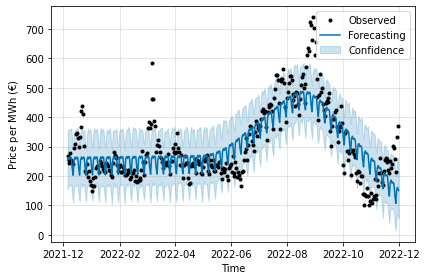

In [72]:
fig1 = prophet.plot(forecast, figsize=(6, 4))
plt.legend(["Observed", "Forecasting", "Confidence"])
plt.ylabel('Price per MWh ($€$)')
plt.xlabel('Time')
# plt.savefig('Prophet.pdf') 

In [73]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2021-12-06,254.017935,155.948363,345.635260
1,2021-12-07,263.879401,170.980592,360.163469
2,2021-12-08,257.078058,166.921869,356.112476
3,2021-12-09,263.883275,168.819952,360.858481
4,2021-12-10,262.191670,171.388345,360.919884
...,...,...,...,...
355,2022-11-26,134.199351,32.962240,224.337556
356,2022-11-27,107.037872,12.980451,200.332120
357,2022-11-28,155.056484,64.773188,246.313603
358,2022-11-29,161.329944,71.128938,261.693839


<function matplotlib.pyplot.show(close=None, block=None)>

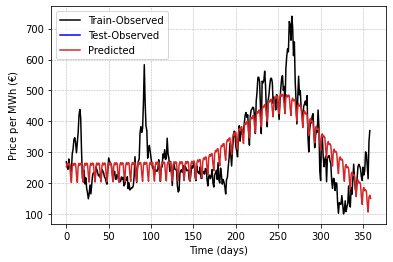

In [74]:
plt.figure(figsize=(6,4))
plt.plot(train['y'],'k', zorder=2)
plt.plot(y_true,'b', zorder=2)
plt.plot(forecast['yhat'],'tab:red', zorder=2)
plt.xlabel('Time (days)')
plt.ylabel('Price per MWh ($€$)')
plt.legend(["Train-Observed", "Test-Observed", "Predicted"], loc="upper left", fancybox=True, shadow=False, ncol=1)
plt.grid(linestyle = '--', linewidth = 0.5, zorder=0)
# plt.savefig('facebook_r.pdf') 
plt.show  

In [75]:
print('Statistical tables for the test base and validation base')
print(" "*254)
display(test['y'].describe())
print(" "*254)
display(forecast['yhat'].describe())

Statistical tables for the test base and validation base
                                                                                                                                                                                                                                                              


count      1.00
mean     382.26
std         NaN
min      382.26
25%      382.26
50%      382.26
75%      382.26
max      382.26
Name: y, dtype: float64

count    360.000000
mean     302.676295
std       84.883299
min      107.037872
25%      256.078761
50%      268.015341
75%      364.479714
max      487.777738
Name: yhat, dtype: float64

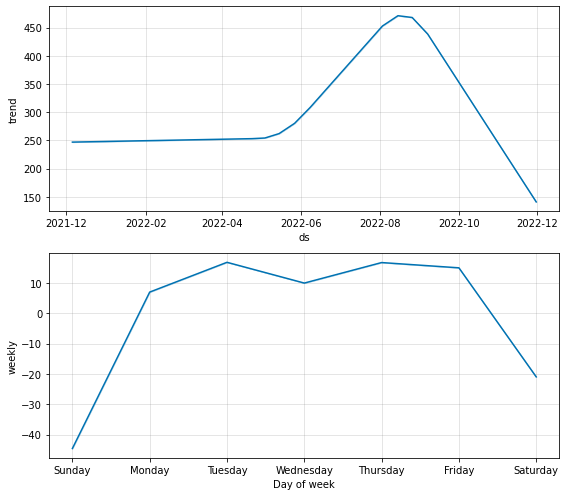

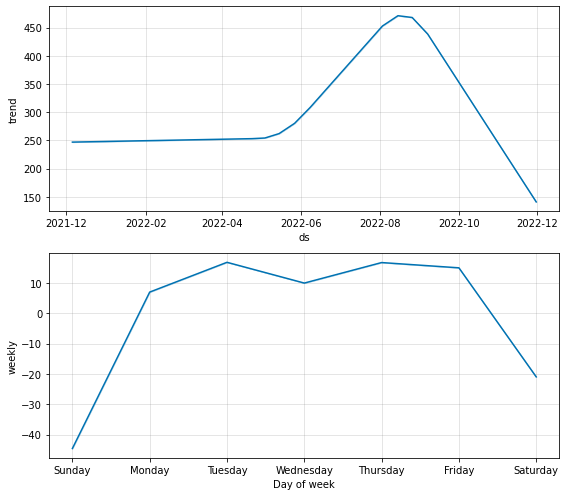

In [76]:
prophet.plot_components(forecast, figsize=(8,7))
# plt.savefig('comp.pdf') 